## Student Information
Name: 廖品捷

Student ID: 110062537

GitHub ID: https://github.com/JamesLiao714

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---

In [32]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

# 1. Data Preparation


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import helpers.data_mining_helpers as dmh

In [34]:
# obtain the data

df_imdb = pd.read_csv('./new_data/imdb_labelled.txt', sep='\t', names=['text','score'], header=None)
df_amazon = pd.read_csv('./new_data/amazon_cells_labelled.txt', sep='\t',names=['text','score'], header=None)
df_yelp = pd.read_csv('./new_data/yelp_labelled.txt', sep='\t', names=['text','score'], header=None)

df = pd.concat([df_imdb, df_amazon, df_yelp], ignore_index = True, axis = 0)

In [35]:
# shape of our data
print(df_imdb.shape)
print(df_amazon.shape)
print(df_yelp.shape)
print(df.shape)

(748, 2)
(1000, 2)
(1000, 2)
(2748, 2)


In [36]:
# show text col
df.text

0       A very, very, very slow-moving, aimless movie ...
1       Not sure who was more lost - the flat characte...
2       Attempting artiness with black & white and cle...
3            Very little music or anything to speak of.  
4       The best scene in the movie was when Gerardo i...
                              ...                        
2743    I think food should have flavor and texture an...
2744                             Appetite instantly gone.
2745    Overall I was not impressed and would not go b...
2746    The whole experience was underwhelming, and I ...
2747    Then, as if I hadn't wasted enough of my life ...
Name: text, Length: 2748, dtype: object

In [37]:
# There are two scores [0,1] for our text
list(set(df.score.values))

[0, 1]

---

# 2. Data Preprocessing

### Missing Values

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [38]:
X = df
X.isnull()

,text,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [39]:
# No missing data was found
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


---

### Duplicated Data

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [40]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [41]:
# 8 duplicated rows were detected
sum(X.duplicated())

17

In [42]:
# drop duplicated rows and keep the first one
X.drop_duplicates(keep = 'first', inplace = True) 

In [43]:
# data number decreased from 2748 to 2731
len(X)

2731

---

### Sampling

In [44]:
X_sample = X.sample(n = 1000) #random state

In [45]:
# numbers of X sample
len(X_sample)

1000

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

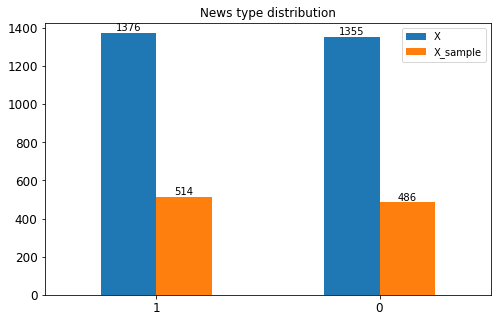

In [47]:
# Comparison of X and X_sample using visualization

v1 = pd.DataFrame(X.score.value_counts())
v2 = pd.DataFrame(X_sample.score.value_counts())
# merge two DF on index for plotting
v3 = v1.merge(v2, left_index = True, right_index = True)
v3.rename(columns = {'score_x': 'X', 'score_y': 'X_sample'}, inplace=True)
max_y = max(v3.max()) + 50
ax = v3.plot(kind = 'bar',
               title = 'News type distribution',
               ylim = [0, max_y], 
               rot = 0, fontsize = 12, figsize = (8,5))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2,
                    p.get_height() + 25), ha='center', va='center')


 ---

###  Feature Creation

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/james/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [50]:
X["unigrams"]

0       [A, very, ,, very, ,, very, slow-moving, ,, ai...
1       [Not, sure, who, was, more, lost, -, the, flat...
2       [Attempting, artiness, with, black, &, white, ...
3       [Very, little, music, or, anything, to, speak,...
4       [The, best, scene, in, the, movie, was, when, ...
                              ...                        
2743    [I, think, food, should, have, flavor, and, te...
2744                       [Appetite, instantly, gone, .]
2745    [Overall, I, was, not, impressed, and, would, ...
2746    [The, whole, experience, was, underwhelming, ,...
2747    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2731, dtype: object

---

### Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X.text)

# count vectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

Now let us look at the term-document matrix we built above.

In [52]:
# We can check the shape of this matrix by:
print(X_tfidf.shape)
analyze = tfidf_vectorizer.build_analyzer()
print(X.iloc[0].text)
analyze(X.iloc[0].text)

(2731, 5155)
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  


['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [53]:
tfidf_vectorizer.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [54]:
# Remove sparse term (tfidf < 0.6)

f_mat = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names())
print(f_mat.shape)
drop_list = []
for col in f_mat.columns:
    if max(f_mat[col]) < 0.6:
        drop_list.append(col)
    
f_mat.drop(drop_list, axis = 1, inplace = True)
print(f_mat.shape)


(2731, 5155)
(2731, 574)


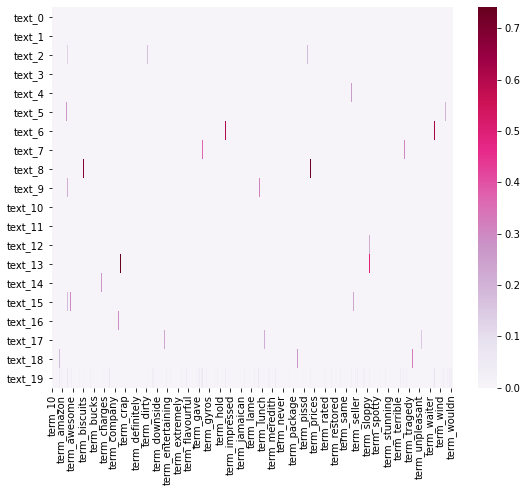

In [55]:
# draw the tfidf matrix
# Take 20 text and term for example

f_mat = f_mat[:20]
plot_x = ["term_"+str(i) for i in f_mat.columns]
plot_y = ["text_"+ str(i) for i in list(X.index)[:20]]
plot_z = f_mat.values

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd"
                 )

---

### Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [56]:
from sklearn.decomposition import PCA

In [57]:
X_reduced = PCA(n_components = 2).fit_transform(X_tfidf.toarray())
X_reduced.shape

(2731, 2)

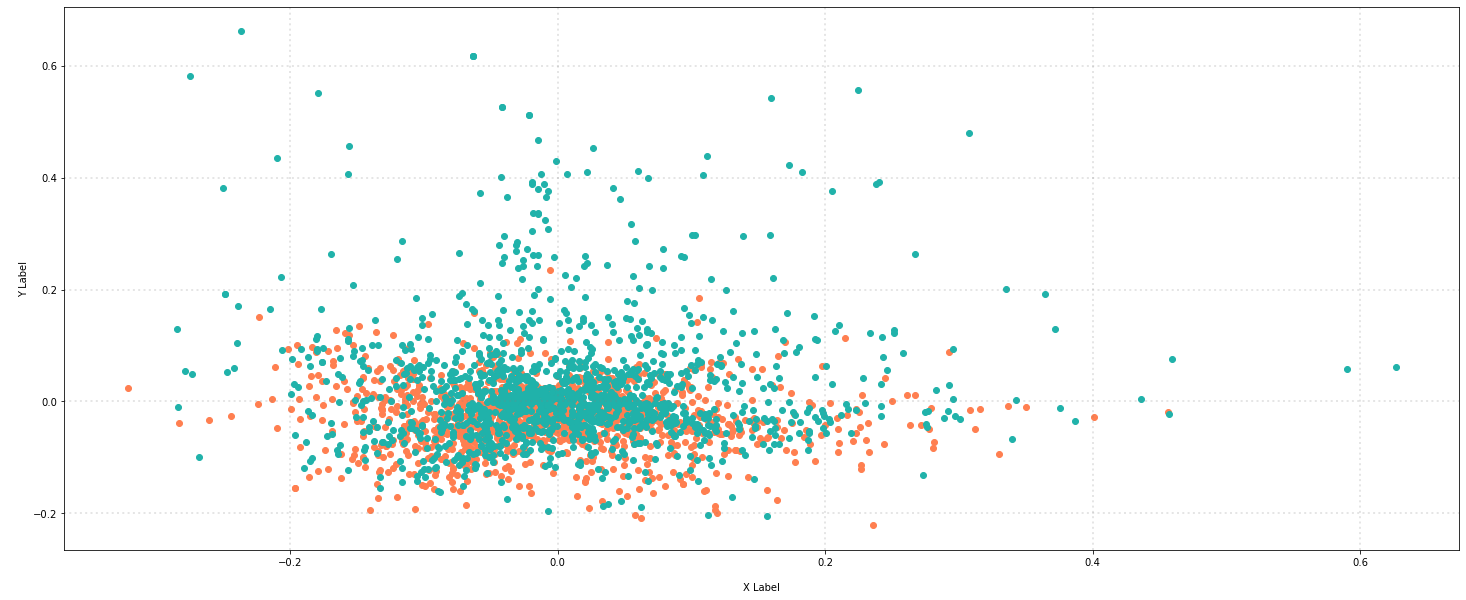

In [58]:
col = ['coral', '#20b2aa']
score = [0,1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, score):
    xs = X_reduced[X['score'] == s].T[0]
    ys = X_reduced[X['score'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [59]:
# pca transformation
X_reduced3 = PCA(n_components = 3).fit_transform(X_tfidf.toarray())
print(X_reduced3.shape)

(2731, 3)


ax.azim -60
ax.elev 30


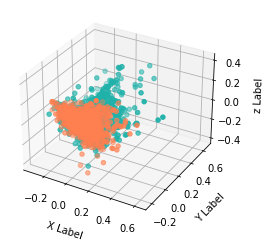

ax.azim 45
ax.elev 0


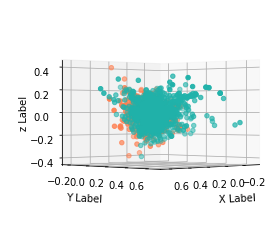

ax.azim 45
ax.elev 45


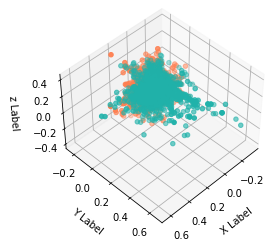

In [60]:
# plot3D
# 3 camera position
pos = [(30, -60), (0, 45), (45, 45)]
col = ['coral', '#20b2aa']
for elev, azim in pos:
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for c, category in zip(col, score):
        xs = X_reduced3[X['score'] == category].T[0]
        ys = X_reduced3[X['score'] == category].T[1]
        zs = X_reduced3[X['score'] == category].T[2]

        ax.scatter3D(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev, azim)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nz Label')
    # show azim, elev of each plot 
    print('ax.azim {}'.format(ax.azim))
    print('ax.elev {}'.format(ax.elev))
    plt.show()

---

### Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `score`, into four binary attributes.

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)

LabelBinarizer()

In [62]:
X['bin_score'] = mlb.transform(X['score']).tolist()
X[0:9]
# not really meaningful

,text,score,unigrams,bin_score
0,"A very, very, very slow-moving, aimless movie ...",0,"[A, very, ,, very, ,, very, slow-moving, ,, ai...",[0]
1,Not sure who was more lost - the flat characte...,0,"[Not, sure, who, was, more, lost, -, the, flat...",[0]
2,Attempting artiness with black & white and cle...,0,"[Attempting, artiness, with, black, &, white, ...",[0]
3,Very little music or anything to speak of.,0,"[Very, little, music, or, anything, to, speak,...",[0]
4,The best scene in the movie was when Gerardo i...,1,"[The, best, scene, in, the, movie, was, when, ...",[1]
5,"The rest of the movie lacks art, charm, meanin...",0,"[The, rest, of, the, movie, lacks, art, ,, cha...",[0]
6,Wasted two hours.,0,"[Wasted, two, hours, .]",[0]
7,Saw the movie today and thought it was a good ...,1,"[Saw, the, movie, today, and, thought, it, was...",[1]
8,A bit predictable.,0,"[A, bit, predictable, .]",[0]


### New data visualizations using K-means

[[ 0.09263711  0.02562496]
 [-0.05368559 -0.01485032]]


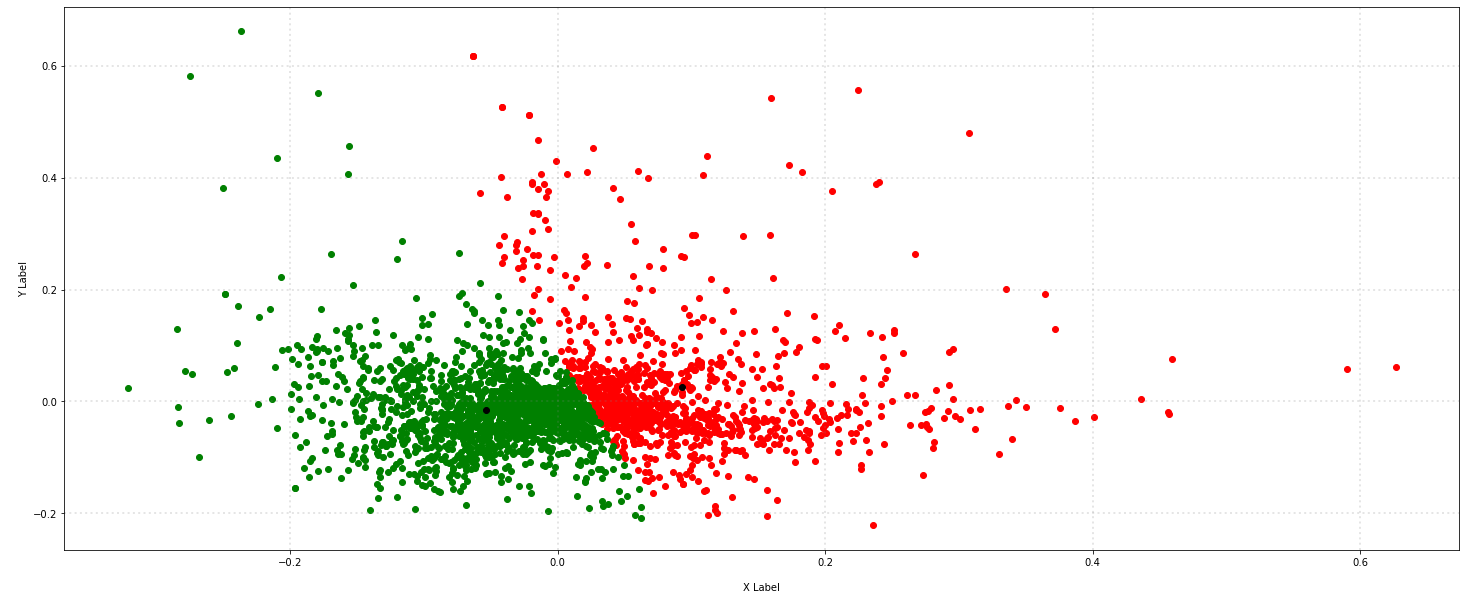

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced)
label = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)


col = ['red', 'green']
score = [0,1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, score):
    xs = X_reduced[label == s].T[0]
    ys = X_reduced[label == s].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.scatter(centroids[:,0] , centroids[:,1] , color = 'black')

plt.show()


In [64]:
# Accuracy of k-means (Not good)
a = [pred for pred, ans in zip(label, X['score'].values) if pred == ans]
print(len(a)/len(X)) 

0.43939948736726475


---

### Atrribute Transformation / Aggregation

In [65]:
import numpy as np

# Aggregstion by axis = 0
tfidf = np.asarray(X_tfidf.sum(axis=0))[0]
print(tfidf.shape)

(5155,)


[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


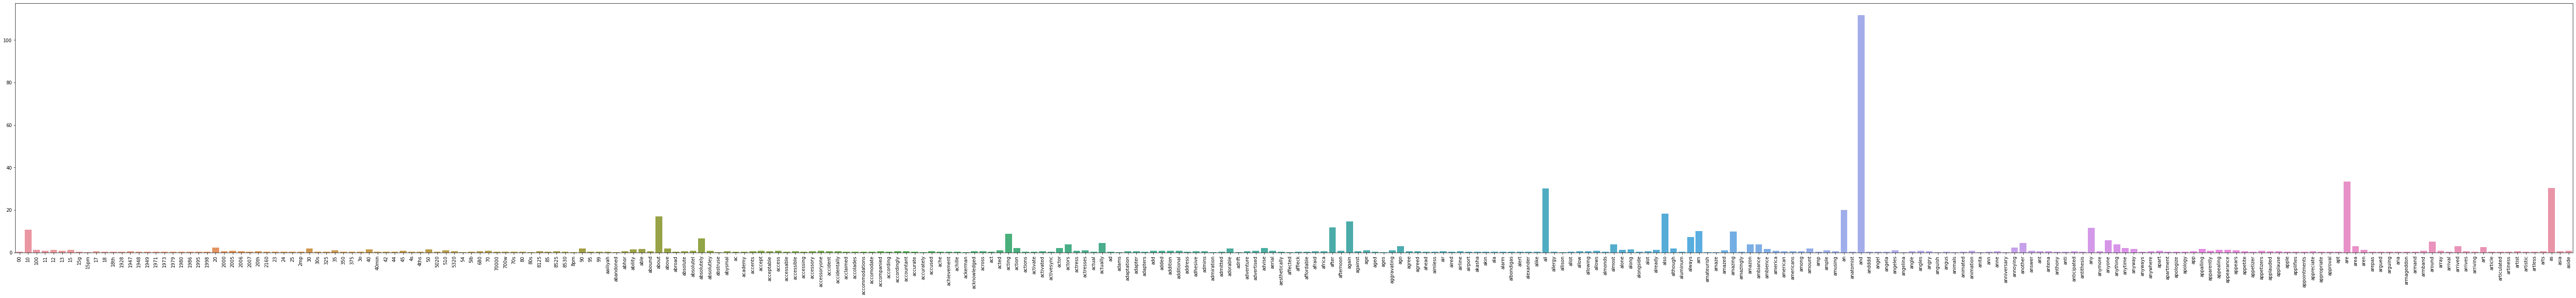

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x = tfidf_vectorizer.get_feature_names()[:300], y = tfidf[:300])
g.set_xticklabels(tfidf_vectorizer.get_feature_names()[:300], rotation = 90)

[Text(0, 0, 'and'),
 Text(1, 0, 'are'),
 Text(2, 0, 'as'),
 Text(3, 0, 'all'),
 Text(4, 0, 'an'),
 Text(5, 0, 'also'),
 Text(6, 0, 'about'),
 Text(7, 0, 'again'),
 Text(8, 0, 'after'),
 Text(9, 0, 'any'),
 Text(10, 0, '10'),
 Text(11, 0, 'am'),
 Text(12, 0, 'amazing'),
 Text(13, 0, 'acting'),
 Text(14, 0, 'always'),
 Text(15, 0, 'absolutely'),
 Text(16, 0, 'anyone'),
 Text(17, 0, 'around'),
 Text(18, 0, 'actually'),
 Text(19, 0, 'another'),
 Text(20, 0, 'actors'),
 Text(21, 0, 'anything'),
 Text(22, 0, 'almost'),
 Text(23, 0, 'amazon'),
 Text(24, 0, 'ambiance'),
 Text(25, 0, 'arrived'),
 Text(26, 0, 'ago'),
 Text(27, 0, 'area'),
 Text(28, 0, 'art'),
 Text(29, 0, 'annoying'),
 Text(30, 0, '20'),
 Text(31, 0, 'advise'),
 Text(32, 0, 'anytime'),
 Text(33, 0, 'actor'),
 Text(34, 0, 'action'),
 Text(35, 0, '30'),
 Text(36, 0, 'adorable'),
 Text(37, 0, 'above'),
 Text(38, 0, '90'),
 Text(39, 0, 'amount'),
 Text(40, 0, 'although'),
 Text(41, 0, 'appalling'),
 Text(42, 0, 'ambience'),
 Text(43

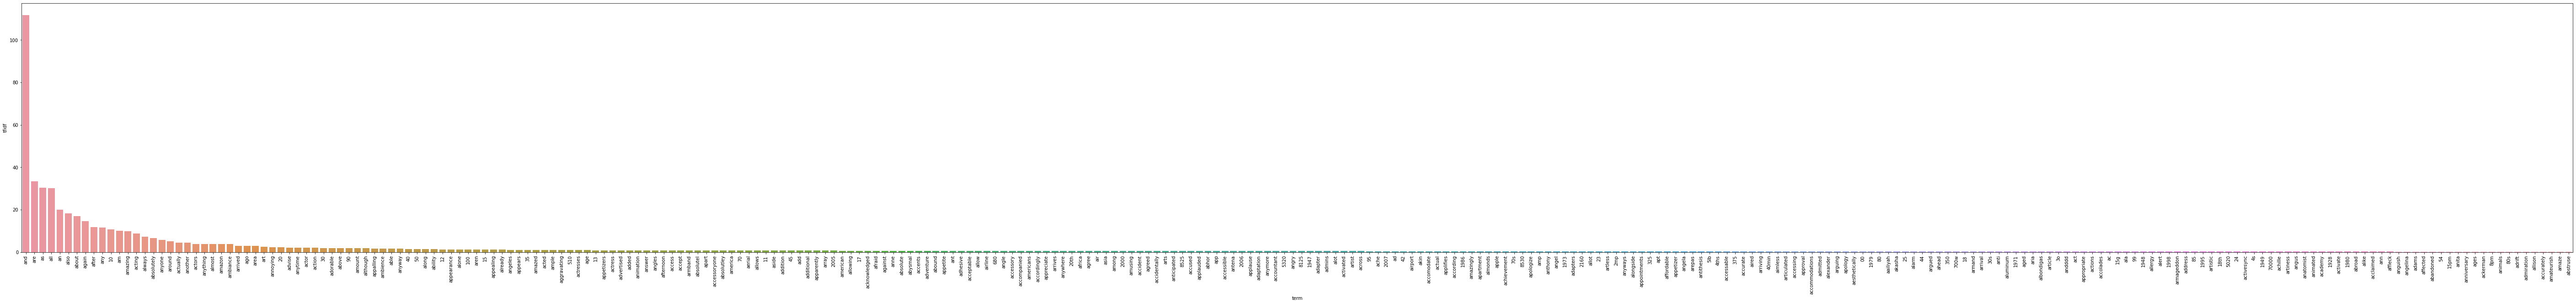

In [67]:
d = pd.DataFrame({'term': tfidf_vectorizer.get_feature_names()[:300], 'tfidf' : tfidf[:300]})
d.sort_values('tfidf', ascending = False, inplace = True)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x = d['term'], y = d['tfidf'])
g.set_xticklabels(d['term'], rotation = 90)

# 3. Naive Bayes classifier

In [68]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

model = MultinomialNB()
# using tf-idfVectorizer
scores = cross_val_score(estimator = model, X = X_tfidf, y = X['score'], scoring='accuracy', cv = 10)
print("Using Tfidf: ", scores.mean())
# using countVectorizer
scores = cross_val_score(estimator = model, X = X_counts, y = X['score'], scoring='accuracy', cv = 10)
print("Using Tf: ", scores.mean())

# The outcome shows that using tf-idf score yields the better acccuracy

Using Tfidf:  0.8238843881179647
Using Tf:  0.8070399187187508


# 4. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [69]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [70]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["The directing and the cinematography aren't quite as good.  "]
['If you do go see this movie, bring a pillow or a girlfriend/boyfriend to keep you occupied through out.  ']
["It's just lame.  "]


In [71]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = tfidf_vectorizer.transform(document_to_transform_1)
document_vector_count_2 = tfidf_vectorizer.transform(document_to_transform_2)
document_vector_count_3 = tfidf_vectorizer.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in bthe documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---